<img src="../Images/video_9_construct_tree.png">

Problem: construct binary tree from inorder and preorder.

Note that, you must need inorder and another order to construct a tree

In [94]:
import matplotlib.pyplot as plt
import numpy as np
def drawBST_(T, x0, x1, y, y_inc,ax):
    if T is not None:
        xm = (x0+x1)/2
        yn = y-y_inc
        if T.left is not None:
            p=np.array([[xm,y], [(x0+xm)/2,yn]])
            ax.plot(p[:,0],p[:,1],linewidth=1,color='k')
            drawBST_(T.left,x0,xm,yn, y_inc,ax)
        if T.right is not None:
            p=np.array([[xm,y], [(x1+xm)/2,yn]])
            ax.plot(p[:,0],p[:,1],linewidth=1,color='k')
            drawBST_(T.right,xm,x1,yn, y_inc,ax)
        ax.text(xm,y, str(T.data), size=10,ha="center", va="center",
            bbox=dict(facecolor='w',boxstyle="circle"))

def drawBST(T): 
    #plt.close('all') 
    fig, ax = plt.subplots()
    drawBST_(T, 0, 800, 800, 80, ax)
    ax.set_aspect(1.0)
    ax.axis('off') 
    plt.show()

In [18]:
class Node:
    def __init__(self, val):
        self.left = None
        self.right = None
        self.data = val

In [ ]:
def inorder_travers(root):
    if(root==None):
        return
    inorder_travers(root.left)
    print(root.data)
    inorder_travers(root.right)

In [80]:
def divide(preorder, inorder):
    root_data = preorder[0]
    if(root_data not in inorder):
        return None, None, None
    preorder.pop(0)
    root = Node(root_data)
    root_idx = inorder.index(root_data)
    left_arr = inorder[:root_idx]
    right_arr = inorder[root_idx+1:]
    return root, left_arr, right_arr

In [81]:
def recursive_build_tree(root, left_arr, right_arr, preorder, inorder):
    print("root: ",root.data)
    print("left: ",left_arr,"right: ", right_arr)
    
    if(len(left_arr)==0 and len(right_arr)==0):
        return root
    
    left_root, left_left_arr, left_right_arr = divide(preorder, left_arr) 
    if(left_root==None):
        root.left=None
    else:
        root.left = recursive_build_tree(left_root, left_left_arr, left_right_arr, preorder, inorder)
    
    right_root, right_left_arr, right_right_arr = divide(preorder, right_arr) 
    if(right_root==None):
        root.right=None
    else:
        root.right = recursive_build_tree(right_root, right_left_arr, right_right_arr, preorder, inorder)
    return root

In [82]:
def construct_tree(preorder, inorder):
    if(len(preorder)==0 or len(inorder)==0):
        return None
    root, left_arr, right_arr = divide(preorder, inorder)
    root = recursive_build_tree(root, left_arr, right_arr, preorder, inorder)
    return root

In [88]:
inorder =[40,20,50, 10, 30, 80,70,90] 
preorder = [10,20,40,50, 30, 70,80,90]
    
root=construct_tree(preorder, inorder)

root:  10
left:  [40, 20, 50] right:  [30, 80, 70, 90]
root:  20
left:  [40] right:  [50]
root:  40
left:  [] right:  []
root:  50
left:  [] right:  []
root:  30
left:  [] right:  [80, 70, 90]
root:  70
left:  [80] right:  [90]
root:  80
left:  [] right:  []
root:  90
left:  [] right:  []


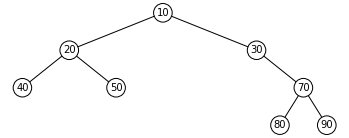

In [95]:
drawBST(root)

<img src="../Images/video_9_construct_tree_2.png">

Time Complexity: O(n^2)
Space : O(1)
We can achive O(n) time using hashTable. That case space will become O(n)

In [117]:
global pre_ix
pre_ix=0
def recursive_build_tree_sol(inorder, preorder, l_start_ix, r_end_ix):
    global pre_ix
    
    if(l_start_ix>r_end_ix):
        return None
    root = Node(preorder[pre_ix])
    root_idx = inorder.index(preorder[pre_ix])
#     print("l_start: ",l_start_ix)
#     print("r_end: ",r_end_ix)
#     print("root_ix: ",root_idx )
#     print("root: ", root.data)
    pre_ix+=1
    root.left = recursive_build_tree_sol(inorder, preorder, l_start_ix, root_idx-1)
    root.right = recursive_build_tree_sol(inorder, preorder, root_idx+1, r_end_ix)

    return root

In [118]:
inorder =[40,20,50, 10, 30, 80,70,90] 
preorder = [10,20,40,50, 30, 70,80,90]
root=recursive_build_tree_sol(inorder, preorder,0,len(preorder)-1)

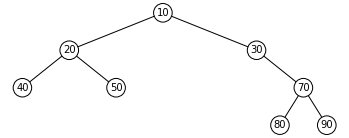

In [119]:
drawBST(root)

# Using dictionary

Time Complexity: O(n)
Space : O(n)

In [127]:
global pre_ix
pre_ix=0
def recursive_build_tree_sol_2(inorder_dict, preorder, l_start_ix, r_end_ix):
    global pre_ix
    
    if(l_start_ix>r_end_ix):
        return None
    root = Node(preorder[pre_ix])
    root_idx = inorder_dict.get(preorder[pre_ix])
#     print("l_start: ",l_start_ix)
#     print("r_end: ",r_end_ix)
#     print("root_ix: ",root_idx )
#     print("root: ", root.data)
    pre_ix+=1
    root.left = recursive_build_tree_sol_2(inorder_dict, preorder, l_start_ix, root_idx-1)
    root.right = recursive_build_tree_sol_2(inorder_dict, preorder, root_idx+1, r_end_ix)
    return root

In [128]:
inorder =[40,20,50, 10, 30, 80,70,90] 
preorder = [10,20,40,50, 30, 70,80,90]
inorder_dict = {}
ix=0
for item in inorder:
    inorder_dict[item]=ix
    ix+=1
print(inorder_dict)
root=recursive_build_tree_sol_2(inorder_dict, preorder,0,len(preorder)-1)

{40: 0, 20: 1, 50: 2, 10: 3, 30: 4, 80: 5, 70: 6, 90: 7}


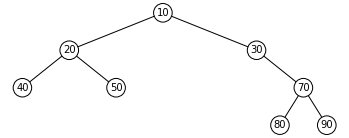

In [129]:
drawBST(root)

In [130]:
x = [10,20,30,40,50]
x.index(30)

2